In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("D:\\Notes\\Data Science\\06_Machine learning\\04_Regression\\02_regression\\height-weight.csv")

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [6]:
df.nunique()

Weight    19
Height    18
dtype: int64

In [7]:
df.columns

Index(['Weight', 'Height'], dtype='object')

Text(0, 0.5, 'Height')

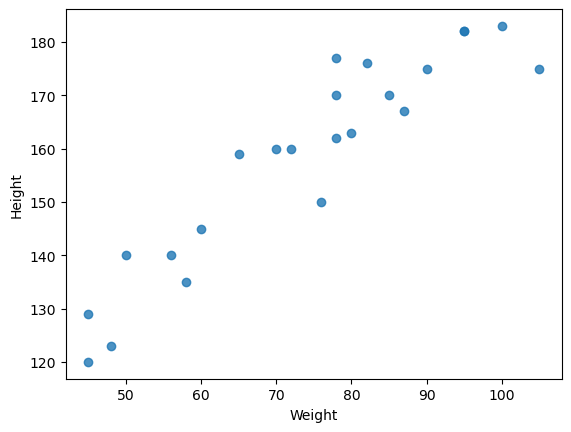

In [10]:
plt.scatter(df['Weight'],df['Height'],marker='o',alpha=0.8)
plt.xlabel('Weight')
plt.ylabel('Height')

In [11]:
y=df['Height']
X=df[['Weight']]

In [12]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [13]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [14]:
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [16]:
X_train.shape

(17, 1)

In [17]:
X_test.shape

(6, 1)

In [18]:
y_test.shape

(6,)

In [19]:
# standarzie

from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Text(0, 0.5, 'Height')

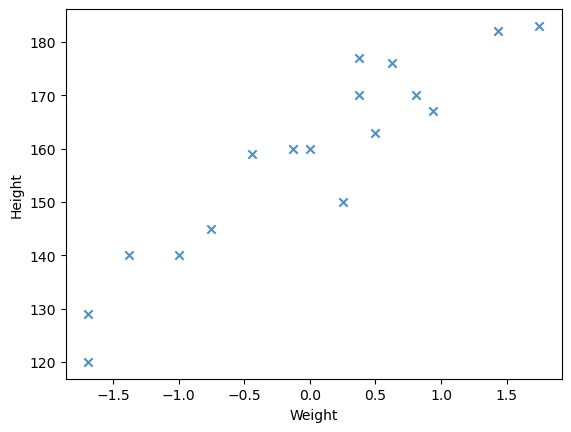

In [22]:
plt.scatter(X_train,y_train,marker='x',alpha=0.8)
plt.xlabel('Weight')
plt.ylabel('Height')

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
linear=LinearRegression()

In [25]:
linear.fit(X_train,y_train)

LinearRegression()

In [26]:
linear.coef_ 

array([16.74247689])

In [27]:
linear.rank_

1

In [28]:
linear.singular_

array([4.12310563])

In [29]:
linear.intercept_ 

158.2941176470588

In [30]:
linear.n_features_in_

1

AttributeError: 'LinearRegression' object has no attribute 'feature_names_in_'

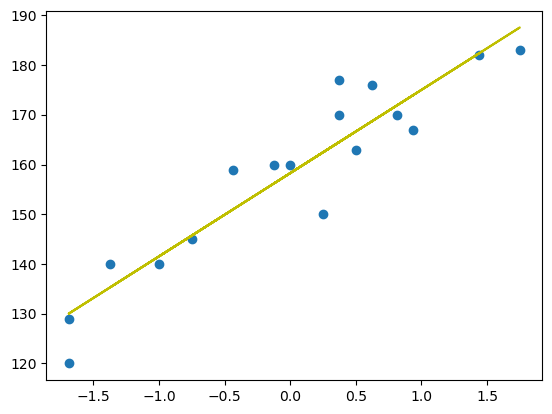

In [31]:
plt.scatter(X_train,y_train)
plt.plot(X_train,linear.predict(X_train),'y')

In [32]:
y_pred=linear.predict(X_test)

In [33]:
y_pred,y_test

(array([164.57110433, 143.6478154 , 177.12507768, 133.18617093,
        182.35589992, 192.81754438]),
 5     162
 1     135
 7     175
 2     123
 11    182
 12    175
 Name: Height, dtype: int64)

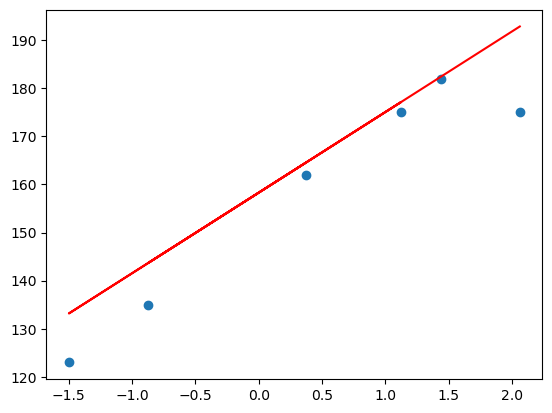

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linear.predict(X_test),'r')

In [35]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [36]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

84.54347908521352
6.950602105794076
9.194752801745869


In [37]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [38]:
score

0.8263598101855496

In [39]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7829497627319371